# Data Cleaning

In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

In [3]:
df_water = pd.read_csv('water_potability.csv')
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
print('NaN values in water dataset : ')
df_water.isna().sum().sum()

NaN values in water dataset : 


1434

In [5]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df_clean = df_water.fillna(df_water.mean())

In [6]:
print('Sum of NaN values after cleaning : ', df_clean.isnull().sum())

Sum of NaN values after cleaning :  ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [7]:
df_clean.sum()

ph                 2.319668e+04
Hardness           6.433065e+05
Solids             7.211817e+07
Chloramines        2.333258e+04
Sulfate            1.093449e+06
Conductivity       1.396248e+06
Organic_carbon     4.679756e+04
Trihalomethanes    2.175143e+05
Turbidity          1.299519e+04
Potability         1.278000e+03
dtype: float64

# Feature Selection

<Axes: >

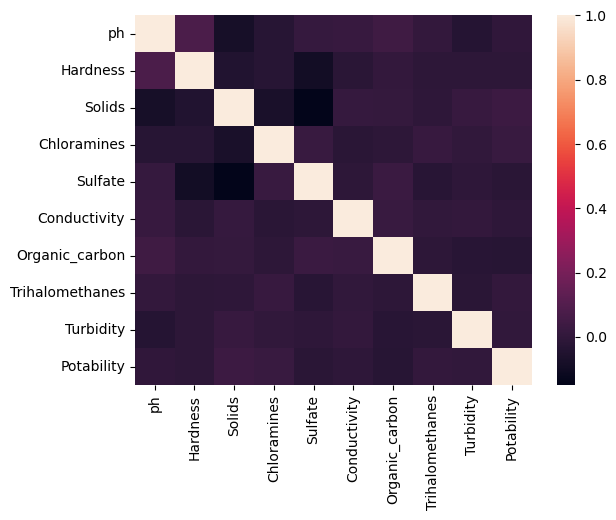

In [8]:
sn.heatmap(df_clean.corr())

In [9]:
x = df_clean[list(df_clean.columns)[0:-1]]

In [10]:
y = df_clean['Potability']

In [11]:
y.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

# Data Balancing

In [12]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [13]:
# Separate features and target
X = df_clean.drop("Potability", axis=1)  
y = df_clean["Potability"]

In [14]:
print("Before Upsampling:", Counter(y))

Before Upsampling: Counter({0: 1998, 1: 1278})


In [15]:
# Upsampling
ros = RandomOverSampler(sampling_strategy={0: 2000, 1: 2000}, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [16]:
print("After Upsampling:", Counter(y_resampled))

After Upsampling: Counter({0: 2000, 1: 2000})


# Data Splitting

In [17]:
#x_train, x_test, y_train, y_test = train_test_split(x , y, train_size = 0.8, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [18]:
print("Number of Records in Train Data : ", X_train.shape)
print('Number of Records in Test Data : ', X_test.shape)

Number of Records in Train Data :  (3200, 9)
Number of Records in Test Data :  (800, 9)


# Model Building

Accuracy : 78.12 % 


<Axes: >

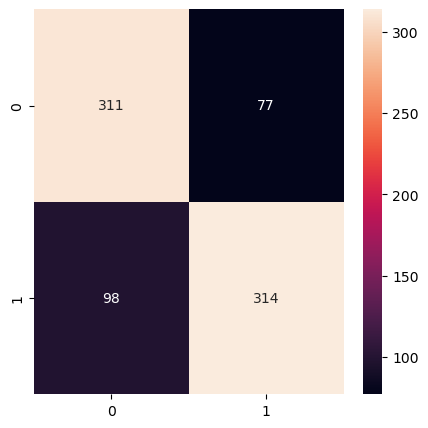

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'Accuracy : {round(100 * accuracy_score(y_test, pred), 2)} % ')
plt.figure(figsize = (5, 5))
sn.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '2g')

In [20]:
sample = X_test.loc[1578 , :]

In [21]:
pred = model.predict([sample])

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
pred

array([0], dtype=int64)

In [23]:
#import pickle
#pickle.dump(model, open("water-test-model", "wb"))
#model = pickle.load(open(r"C:\Users\lenovo\HCCDA-AI\Water App\water-test-model", "rb"))
import pickle
import os

# Save the model first
pickle.dump(model, open("water-test-model", "wb"))

# Define the correct path to your file
# Make sure this path actually exists on your system
file_path = r"C:\Users\lenovo\HCCDA-AI\Water App\water-test-model"

# Check if the file exists before trying to load it
if os.path.exists(file_path):
    model = pickle.load(open(file_path, "rb"))
else:
    print(f"File not found at: {file_path}")
    # You might want to create the directory if it doesn't exist
    # os.makedirs(os.path.dirname(file_path), exist_ok=True)
    # Or use a different path where you have write permissions

In [24]:
import pickle

with open("water-test-model.pkl", "wb") as f:
    pickle.dump(model, f)
